<a href="https://colab.research.google.com/github/Mahamudul-Hasan-Rafi/Matrix-Factorization-on-Movie-Recommendation-System/blob/main/Assignment_on_Matrix_Factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Creation

In [ ]:
!ls

drive  sample_data


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('Matrix_Factorization_Assignment.csv')
df

,Index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,NaN,NaN,4.0,6.0,10.0,0.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,5.0,1.0,9.0,NaN,NaN,NaN,6.0,3.0,NaN,0.0,...,1.0,7.0,10.0,NaN,NaN,4.0,5.0,NaN,7.0,6.0,7.0,10.0,8.0,7.0,NaN,NaN,1.0,9.0,NaN,NaN,9.0,NaN,NaN,7.0,1.0,9.0,10.0,1.0,1.0,NaN,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,8.0,NaN,8.0,NaN,5.0,2.0,NaN,2.0,7.0,NaN,8.0,2.0,3.0,6.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,6.0,NaN,9.0,NaN,...,9.0,NaN,9.0,NaN,NaN,NaN,6.0,0.0,0.0,7.0,0.0,8.0,10.0,0.0,NaN,2.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,7.0,6.0,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,NaN,NaN,0.0,9.0,4.0,4.0,3.0,NaN,1.0,0.0,NaN,4.0,1.0,NaN,NaN,9.0,7.0,NaN,6.0,NaN,6.0,1.0,NaN,6.0,6.0,NaN,0.0,NaN,...,NaN,6.0,2.0,10.0,NaN,NaN,9.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,1.0,NaN,9.0,2.0,9.0,1.0,NaN,NaN,2.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,NaN,4.0,1.0,5.0,NaN,3.0,5.0,4.0,3.0,5.0,8.0,7.0,NaN,10.0,6.0,8.0,5.0,NaN,8.0,NaN,4.0,NaN,NaN,7.0,3.0,NaN,NaN,NaN,...,10.0,8.0,0.0,NaN,9.0,NaN,NaN,NaN,2.0,2.0,5.0,NaN,NaN,2.0,7.0,NaN,2.0,NaN,2.0,1.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,NaN,10.0,NaN,NaN,2.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,7.0,3.0,6.0,1.0,NaN,1.0,NaN,5.0,NaN,4.0,NaN,6.0,...,NaN,0.0,1.0,1.0,10.0,NaN,10.0,NaN,1.0,2.0,10.0,2.0,6.0,9.0,NaN,NaN,NaN,8.0,10.0,NaN,NaN,5.0,8.0,NaN,NaN,6.0,NaN,8.0,10.0,0.0,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3964,1.0,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,6.0,NaN,10.0,5.0,NaN,5.0,6.0,NaN,7.0,NaN,NaN,3.0,3.0,2.0,10.0,NaN,6.0,NaN,3.0,3.0,NaN,3.0,NaN,8.0,1.0,1.0,NaN,3.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,10.0,NaN,NaN,4.0,NaN,3.0,4.0,NaN,7.0,0.0,9.0,0.0,0.0,NaN,5.0,10.0,0.0,5.0,10.0,NaN,7.0,9.0,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,17258,3.0,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,4.0,6.0,9.0,7.0,NaN,NaN,8.0,NaN,NaN,2.0,NaN,2.0,8.0,4.0,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,5.0,6.0,2.0,...,7.0,NaN,NaN,8.0,NaN,0.0,NaN,8.0,NaN,6.0,NaN,NaN,0.0,NaN,NaN,NaN,4.0,5.0,NaN,10.0,NaN,NaN,3.0,8.0,1.0,3.0,3.0,0.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,20528,NaN,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,9.0,0.0,1.0,NaN,NaN,NaN,NaN,7.0,8.0,2.0,0.0,5.0,10.0,3.0,NaN,NaN,7.0,NaN,4.0,NaN,8.0,NaN,NaN,NaN,NaN,10.0,1.0,6.0,3.0,...,7.0,NaN,NaN,8.0,4.0,NaN,NaN,9.0,NaN,8.0,9.0,5.0,8.0,4.0,NaN,2.0,6.0,7.0,8.0,NaN,8.0,NaN,1.0,NaN,8.0,NaN,7.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,1875,10.0,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,NaN,1.0,0.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3.0,4.0,NaN,7.0,9.0,6.0,NaN,10.0,1.0,NaN,4.0,4.0,8.0,8.0,3.0,NaN,...,6.0,2.0,1.0,4.0,NaN,0.0,8.0,2.0,NaN,NaN,NaN,6.0,2.0,NaN,0.0,NaN,0.0,4.0,7.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,3.0,7.0,10.0,1.0,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [ ]:
df.shape

(45000, 5001)

In [ ]:
index_id=310

In [ ]:

new_df=df[df['Index']%index_id!=0]
new_df.shape

(44850, 5001)

In [ ]:
for i in range(new_df.shape[1]):
  if(i%index_id==0):
    new_df.drop(str(i),axis=1,inplace=True)
new_df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(44850, 4984)

In [ ]:
new_df

,Index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4959,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,NaN,NaN,4.0,6.0,10.0,0.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,5.0,1.0,9.0,NaN,NaN,NaN,6.0,3.0,NaN,0.0,9.0,...,NaN,7.0,10.0,NaN,NaN,4.0,5.0,NaN,7.0,6.0,7.0,10.0,8.0,7.0,NaN,NaN,1.0,9.0,NaN,NaN,9.0,NaN,NaN,7.0,1.0,9.0,10.0,1.0,1.0,NaN,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,8.0,NaN,8.0,NaN,5.0,2.0,NaN,2.0,7.0,NaN,8.0,2.0,3.0,6.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,6.0,NaN,9.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,6.0,0.0,0.0,7.0,0.0,8.0,10.0,0.0,NaN,2.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,7.0,6.0,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,NaN,NaN,0.0,9.0,4.0,4.0,3.0,NaN,1.0,0.0,NaN,4.0,1.0,NaN,NaN,9.0,7.0,NaN,6.0,NaN,6.0,1.0,NaN,6.0,6.0,NaN,0.0,NaN,4.0,...,NaN,6.0,2.0,10.0,NaN,NaN,9.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,1.0,NaN,9.0,2.0,9.0,1.0,NaN,NaN,2.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,NaN,4.0,1.0,5.0,NaN,3.0,5.0,4.0,3.0,5.0,8.0,7.0,NaN,10.0,6.0,8.0,5.0,NaN,8.0,NaN,4.0,NaN,NaN,7.0,3.0,NaN,NaN,NaN,NaN,...,NaN,8.0,0.0,NaN,9.0,NaN,NaN,NaN,2.0,2.0,5.0,NaN,NaN,2.0,7.0,NaN,2.0,NaN,2.0,1.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,NaN,10.0,NaN,NaN,2.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,7.0,3.0,6.0,1.0,NaN,1.0,NaN,5.0,NaN,4.0,NaN,6.0,2.0,...,5.0,0.0,1.0,1.0,10.0,NaN,10.0,NaN,1.0,2.0,10.0,2.0,6.0,9.0,NaN,NaN,NaN,8.0,10.0,NaN,NaN,5.0,8.0,NaN,NaN,6.0,NaN,8.0,10.0,0.0,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3964,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,6.0,NaN,10.0,5.0,NaN,5.0,6.0,NaN,7.0,NaN,NaN,3.0,3.0,2.0,10.0,NaN,6.0,NaN,3.0,3.0,NaN,3.0,NaN,8.0,1.0,1.0,NaN,3.0,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,10.0,NaN,NaN,4.0,NaN,3.0,4.0,NaN,7.0,0.0,9.0,0.0,0.0,NaN,5.0,10.0,0.0,5.0,10.0,NaN,7.0,9.0,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,17258,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,4.0,6.0,9.0,7.0,NaN,NaN,8.0,NaN,NaN,2.0,NaN,2.0,8.0,4.0,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,5.0,6.0,2.0,NaN,...,2.0,NaN,NaN,8.0,NaN,0.0,NaN,8.0,NaN,6.0,NaN,NaN,0.0,NaN,NaN,NaN,4.0,5.0,NaN,10.0,NaN,NaN,3.0,8.0,1.0,3.0,3.0,0.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,20528,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,9.0,0.0,1.0,NaN,NaN,NaN,NaN,7.0,8.0,2.0,0.0,5.0,10.0,3.0,NaN,NaN,7.0,NaN,4.0,NaN,8.0,NaN,NaN,NaN,NaN,10.0,1.0,6.0,3.0,0.0,...,1.0,NaN,NaN,8.0,4.0,NaN,NaN,9.0,NaN,8.0,9.0,5.0,8.0,4.0,NaN,2.0,6.0,7.0,8.0,NaN,8.0,NaN,1.0,NaN,8.0,NaN,7.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,1875,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,NaN,1.0,0.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3.0,4.0,NaN,7.0,9.0,6.0,NaN,10.0,1.0,NaN,4.0,4.0,8.0,8.0,3.0,NaN,NaN,...,NaN,2.0,1.0,4.0,NaN,0.0,8.0,2.0,NaN,NaN,NaN,6.0,2.0,NaN,0.0,NaN,0.0,4.0,7.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,3.0,7.0,10.0,1.0,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [ ]:
f=new_df.to_csv('Modified_Dataset.csv', index=False)

In [ ]:
new_dataset=pd.read_csv('Modified_Dataset.csv')
new_dataset.shape

(44850, 4984)

In [ ]:
new_dataset

,Index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4959,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,NaN,NaN,4.0,6.0,10.0,0.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,5.0,1.0,9.0,NaN,NaN,NaN,6.0,3.0,NaN,0.0,9.0,...,NaN,7.0,10.0,NaN,NaN,4.0,5.0,NaN,7.0,6.0,7.0,10.0,8.0,7.0,NaN,NaN,1.0,9.0,NaN,NaN,9.0,NaN,NaN,7.0,1.0,9.0,10.0,1.0,1.0,NaN,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,8.0,NaN,8.0,NaN,5.0,2.0,NaN,2.0,7.0,NaN,8.0,2.0,3.0,6.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,6.0,NaN,9.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,6.0,0.0,0.0,7.0,0.0,8.0,10.0,0.0,NaN,2.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,7.0,6.0,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,NaN,NaN,0.0,9.0,4.0,4.0,3.0,NaN,1.0,0.0,NaN,4.0,1.0,NaN,NaN,9.0,7.0,NaN,6.0,NaN,6.0,1.0,NaN,6.0,6.0,NaN,0.0,NaN,4.0,...,NaN,6.0,2.0,10.0,NaN,NaN,9.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,1.0,NaN,9.0,2.0,9.0,1.0,NaN,NaN,2.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,NaN,4.0,1.0,5.0,NaN,3.0,5.0,4.0,3.0,5.0,8.0,7.0,NaN,10.0,6.0,8.0,5.0,NaN,8.0,NaN,4.0,NaN,NaN,7.0,3.0,NaN,NaN,NaN,NaN,...,NaN,8.0,0.0,NaN,9.0,NaN,NaN,NaN,2.0,2.0,5.0,NaN,NaN,2.0,7.0,NaN,2.0,NaN,2.0,1.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,NaN,10.0,NaN,NaN,2.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,7.0,3.0,6.0,1.0,NaN,1.0,NaN,5.0,NaN,4.0,NaN,6.0,2.0,...,5.0,0.0,1.0,1.0,10.0,NaN,10.0,NaN,1.0,2.0,10.0,2.0,6.0,9.0,NaN,NaN,NaN,8.0,10.0,NaN,NaN,5.0,8.0,NaN,NaN,6.0,NaN,8.0,10.0,0.0,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44845,3964,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,6.0,NaN,10.0,5.0,NaN,5.0,6.0,NaN,7.0,NaN,NaN,3.0,3.0,2.0,10.0,NaN,6.0,NaN,3.0,3.0,NaN,3.0,NaN,8.0,1.0,1.0,NaN,3.0,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,10.0,NaN,NaN,4.0,NaN,3.0,4.0,NaN,7.0,0.0,9.0,0.0,0.0,NaN,5.0,10.0,0.0,5.0,10.0,NaN,7.0,9.0,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44846,17258,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,4.0,6.0,9.0,7.0,NaN,NaN,8.0,NaN,NaN,2.0,NaN,2.0,8.0,4.0,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,5.0,6.0,2.0,NaN,...,2.0,NaN,NaN,8.0,NaN,0.0,NaN,8.0,NaN,6.0,NaN,NaN,0.0,NaN,NaN,NaN,4.0,5.0,NaN,10.0,NaN,NaN,3.0,8.0,1.0,3.0,3.0,0.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44847,20528,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,9.0,0.0,1.0,NaN,NaN,NaN,NaN,7.0,8.0,2.0,0.0,5.0,10.0,3.0,NaN,NaN,7.0,NaN,4.0,NaN,8.0,NaN,NaN,NaN,NaN,10.0,1.0,6.0,3.0,0.0,...,1.0,NaN,NaN,8.0,4.0,NaN,NaN,9.0,NaN,8.0,9.0,5.0,8.0,4.0,NaN,2.0,6.0,7.0,8.0,NaN,8.0,NaN,1.0,NaN,8.0,NaN,7.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44848,1875,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,NaN,1.0,0.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3.0,4.0,NaN,7.0,9.0,6.0,NaN,10.0,1.0,NaN,4.0,4.0,8.0,8.0,3.0,NaN,NaN,...,NaN,2.0,1.0,4.0,NaN,0.0,8.0,2.0,NaN,NaN,NaN,6.0,2.0,NaN,0.0,NaN,0.0,4.0,7.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,3.0,7.0,10.0,1.0,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


Initailization and Normalization


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import Normalizer

In [ ]:
x=np.random.randint(10,size=(2,2))
x

array([[1, 4],
       [8, 1]])

In [ ]:
data_norm=Normalizer(norm='l2').fit(x)
data_normalized=data_norm.transform(x)
data_normalized=data_normalized
data_normalized
#data_normalized.sum(axis=1)

array([[0.24253563, 0.9701425 ],
       [0.99227788, 0.12403473]])

In [ ]:
new_dataset

,Index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4959,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,NaN,NaN,4.0,6.0,10.0,0.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,5.0,1.0,9.0,NaN,NaN,NaN,6.0,3.0,NaN,0.0,9.0,...,NaN,7.0,10.0,NaN,NaN,4.0,5.0,NaN,7.0,6.0,7.0,10.0,8.0,7.0,NaN,NaN,1.0,9.0,NaN,NaN,9.0,NaN,NaN,7.0,1.0,9.0,10.0,1.0,1.0,NaN,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,8.0,NaN,8.0,NaN,5.0,2.0,NaN,2.0,7.0,NaN,8.0,2.0,3.0,6.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,6.0,NaN,9.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,6.0,0.0,0.0,7.0,0.0,8.0,10.0,0.0,NaN,2.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,7.0,6.0,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,NaN,NaN,0.0,9.0,4.0,4.0,3.0,NaN,1.0,0.0,NaN,4.0,1.0,NaN,NaN,9.0,7.0,NaN,6.0,NaN,6.0,1.0,NaN,6.0,6.0,NaN,0.0,NaN,4.0,...,NaN,6.0,2.0,10.0,NaN,NaN,9.0,NaN,2.0,2.0,NaN,9.0,NaN,NaN,1.0,NaN,9.0,2.0,9.0,1.0,NaN,NaN,2.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,NaN,4.0,1.0,5.0,NaN,3.0,5.0,4.0,3.0,5.0,8.0,7.0,NaN,10.0,6.0,8.0,5.0,NaN,8.0,NaN,4.0,NaN,NaN,7.0,3.0,NaN,NaN,NaN,NaN,...,NaN,8.0,0.0,NaN,9.0,NaN,NaN,NaN,2.0,2.0,5.0,NaN,NaN,2.0,7.0,NaN,2.0,NaN,2.0,1.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,6.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,NaN,10.0,NaN,NaN,2.0,NaN,8.0,6.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,7.0,3.0,6.0,1.0,NaN,1.0,NaN,5.0,NaN,4.0,NaN,6.0,2.0,...,5.0,0.0,1.0,1.0,10.0,NaN,10.0,NaN,1.0,2.0,10.0,2.0,6.0,9.0,NaN,NaN,NaN,8.0,10.0,NaN,NaN,5.0,8.0,NaN,NaN,6.0,NaN,8.0,10.0,0.0,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44845,3964,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,6.0,NaN,10.0,5.0,NaN,5.0,6.0,NaN,7.0,NaN,NaN,3.0,3.0,2.0,10.0,NaN,6.0,NaN,3.0,3.0,NaN,3.0,NaN,8.0,1.0,1.0,NaN,3.0,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,6.0,2.0,10.0,NaN,NaN,4.0,NaN,3.0,4.0,NaN,7.0,0.0,9.0,0.0,0.0,NaN,5.0,10.0,0.0,5.0,10.0,NaN,7.0,9.0,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44846,17258,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,4.0,6.0,9.0,7.0,NaN,NaN,8.0,NaN,NaN,2.0,NaN,2.0,8.0,4.0,NaN,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,5.0,6.0,2.0,NaN,...,2.0,NaN,NaN,8.0,NaN,0.0,NaN,8.0,NaN,6.0,NaN,NaN,0.0,NaN,NaN,NaN,4.0,5.0,NaN,10.0,NaN,NaN,3.0,8.0,1.0,3.0,3.0,0.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44847,20528,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,9.0,0.0,1.0,NaN,NaN,NaN,NaN,7.0,8.0,2.0,0.0,5.0,10.0,3.0,NaN,NaN,7.0,NaN,4.0,NaN,8.0,NaN,NaN,NaN,NaN,10.0,1.0,6.0,3.0,0.0,...,1.0,NaN,NaN,8.0,4.0,NaN,NaN,9.0,NaN,8.0,9.0,5.0,8.0,4.0,NaN,2.0,6.0,7.0,8.0,NaN,8.0,NaN,1.0,NaN,8.0,NaN,7.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44848,1875,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,NaN,1.0,0.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3.0,4.0,NaN,7.0,9.0,6.0,NaN,10.0,1.0,NaN,4.0,4.0,8.0,8.0,3.0,NaN,NaN,...,NaN,2.0,1.0,4.0,NaN,0.0,8.0,2.0,NaN,NaN,NaN,6.0,2.0,NaN,0.0,NaN,0.0,4.0,7.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,3.0,7.0,10.0,1.0,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [ ]:
U_t=np.random.rand(new_dataset.shape[0],100)
U_t

array([[0.18636975, 0.79518874, 0.94158706, ..., 0.30840749, 0.07219909,
        0.45557108],
       [0.50676846, 0.53021355, 0.55652562, ..., 0.04068669, 0.47815276,
        0.8620968 ],
       [0.22709489, 0.26339038, 0.17929478, ..., 0.6076717 , 0.32618099,
        0.05486489],
       ...,
       [0.27742155, 0.1141812 , 0.44582604, ..., 0.58185475, 0.85275959,
        0.48543733],
       [0.62240327, 0.17622965, 0.44767764, ..., 0.10957138, 0.61955456,
        0.03959755],
       [0.57304925, 0.59485622, 0.84414244, ..., 0.43982664, 0.89766744,
        0.231113  ]])

In [ ]:
V_t=np.random.rand(new_dataset.shape[1],100)
V_t

array([[0.00641544, 0.97981198, 0.32388732, ..., 0.07400107, 0.01520404,
        0.48440671],
       [0.05857565, 0.92341011, 0.28652921, ..., 0.51848572, 0.91814469,
        0.66555993],
       [0.04116264, 0.54031733, 0.33655518, ..., 0.53295772, 0.55259615,
        0.93705956],
       ...,
       [0.68768514, 0.65693541, 0.05231977, ..., 0.11293115, 0.66243541,
        0.94721884],
       [0.46844595, 0.37771632, 0.22842001, ..., 0.77890396, 0.66345462,
        0.01414885],
       [0.45627559, 0.47570935, 0.43816135, ..., 0.75124817, 0.72093999,
        0.30163113]])

In [ ]:
print(U_t.shape)
print(V_t.shape)

(44850, 100)
(4984, 100)


In [ ]:
U_norm=Normalizer(norm='l2').fit(U_t)
U_normalized=U_norm.transform(U_t)
U_normalized

array([[0.03089677, 0.13182807, 0.15609829, ..., 0.05112844, 0.01196932,
        0.07552553],
       [0.08773991, 0.0917991 , 0.09635467, ..., 0.00704433, 0.0827855 ,
        0.14926007],
       [0.04066422, 0.04716339, 0.032105  , ..., 0.10881132, 0.05840684,
        0.00982425],
       ...,
       [0.04831567, 0.01988577, 0.07764495, ..., 0.10133568, 0.14851639,
        0.08454364],
       [0.10470816, 0.02964747, 0.07531372, ..., 0.01843341, 0.10422892,
        0.00666158],
       [0.11065811, 0.11486913, 0.1630073 , ..., 0.08493229, 0.17334319,
        0.04462885]])

In [ ]:
V_norm=Normalizer(norm='l2').fit(V_t)
V_normalized=U_norm.transform(V_t)
V_normalized
# V_normalized1=V_normalized**2
# V_normalized1[0].sum()

array([[0.00123511, 0.18863479, 0.06235524, ..., 0.01424679, 0.0029271 ,
        0.09325867],
       [0.01017157, 0.16034876, 0.04975536, ..., 0.09003425, 0.15943443,
        0.11557347],
       [0.00782429, 0.10270474, 0.06397317, ..., 0.10130581, 0.10503872,
        0.1781184 ],
       ...,
       [0.11592128, 0.11073788, 0.00881941, ..., 0.01903651, 0.111665  ,
        0.15967019],
       [0.08554936, 0.06897997, 0.04171492, ..., 0.14224636, 0.12116257,
        0.00258392],
       [0.08075525, 0.08419479, 0.07754925, ..., 0.13296182, 0.12759764,
        0.05338505]])

In [ ]:
lambda_u=(0.00015 + 0.0001*(index_id % 8))
lambda_v=(0.00025-0.0001*(index_id%7))

In [ ]:
class Matrix_factorization:
  def __init__(self, K, iterations):
    self.K=K
    self.iterations=iterations
    self.loss=[]

    self.U=np.random.rand(new_dataset.shape[0],self.K)
    self.V=np.random.rand(new_dataset.shape[1],self.K)
    
  def matrix_factorization_func(self):
    U_norm=Normalizer(norm='l2').fit(self.U)
    self.U=U_norm.transform(self.U)

    V_norm=Normalizer(norm='l2').fit(self.V)
    self.V=V_norm.transform(self.V)

    for i in range(self.iterations):

      # Finding V
      U_=np.zeros([self.K,self.K])
      for i in range(self.U.shape[0]):
        u_i=self.U[i].reshape(self.K,1)
        U_+=np.dot(u_i,u_i.transpose())

      lambda_Ik1=lambda_v*np.identity(self.K)

      left_side=np.linalg.inv(lambda_Ik1+U_)
      right_side=np.dot(new_dataset.fillna(0).transpose(),self.U)

      self.V=np.dot(left_side,right_side.transpose())
      
      # print('V:  ',V)
      # print('V shape:  ',V.shape)

      #Finding U
      V_=np.zeros([self.K,self.K])
      for i in range(self.V.shape[1]):
        v_i=self.V.transpose()[i].reshape(self.K,1)
        V_+=np.dot(v_i,v_i.transpose())

      lambda_Ik2=lambda_u*np.identity(self.K)

      left_side=np.linalg.inv(lambda_Ik2+V_)
      right_side=np.dot(new_dataset.fillna(0),self.V.transpose())

      self.U=np.dot(right_side,left_side)
      
      # print('U:  ',U)
      # print('U shape:  ',U.shape)

      L=np.nansum(np.square(new_dataset-np.dot(self.U,self.V)))/np.nansum(new_dataset.count())
      print('Loss:  ',L)
      self.loss.append(L)

  def plot_curve(self):
    x=[]
    for j in range(self.iterations):
      x.append(j)
    plt.plot(x, self.loss)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
      
    plt.title('Loss Curve')

    plt.show()


Loss:   13.612884665666392
Loss:   13.43084896488119
Loss:   13.395275138052435
Loss:   13.37289169551754
Loss:   13.358121505252756
Loss:   13.347809322044139
Loss:   13.340263072852498
Loss:   13.334531824376903
Loss:   13.330048201847355
Loss:   13.326455352197677
Loss:   13.323518818515481
Loss:   13.321078851310816
Loss:   13.319023197024922
Loss:   13.317270842330025
Loss:   13.315761936697877
Loss:   13.314451339698392
Loss:   13.313304379668221
Loss:   13.31229398380174
Loss:   13.311398703882956
Loss:   13.310601322809868
Loss:   13.309887856633328
Loss:   13.309246826336143
Loss:   13.308668715928889
Loss:   13.308145567961619
Loss:   13.3076706774373
Loss:   13.30723835160266
Loss:   13.30684372863649
Loss:   13.306482627269192
Loss:   13.306151437651344
Loss:   13.305847022561133
Loss:   13.305566647514889
Loss:   13.305307917973064
Loss:   13.30506872766461
Loss:   13.304847218681664
Loss:   13.304641747428693
Loss:   13.30445085458229
Loss:   13.304273239448811
Loss:   13

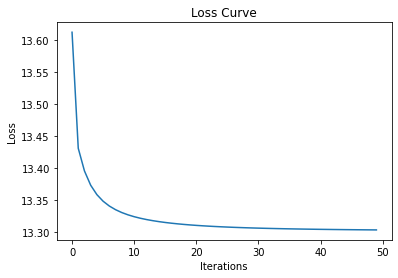

In [ ]:
m_f=Matrix_factorization(100,50)
m_f.matrix_factorization_func()
m_f.plot_curve()

Loss:   12.146949409984607
Loss:   11.877316277820439
Loss:   11.717873694854104
Loss:   11.620307933712967
Loss:   11.558074884371962
Loss:   11.51617124328158
Loss:   11.486631117288628
Loss:   11.465037652162483
Loss:   11.448791831649785
Loss:   11.436280868977201
Loss:   11.426458547520925
Loss:   11.418620590336747
Loss:   11.41227797990351
Loss:   11.407082226626562
Loss:   11.402779488603969
Loss:   11.399181391688415
Loss:   11.396145877186576
Loss:   11.393564299263524
Loss:   11.391352518572036
Loss:   11.389444642388955


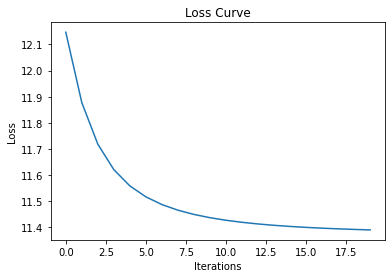

In [ ]:
m_f=Matrix_factorization(500,20)
m_f.matrix_factorization_func()
m_f.plot_curve()

Loss:   13.921627801532438
Loss:   13.631491972375366
Loss:   13.613803917631637
Loss:   13.60267597937508
Loss:   13.595320770274853
Loss:   13.590165869903302
Loss:   13.58637165042012
Loss:   13.583469055576169
Loss:   13.581179954111915
Loss:   13.57933022745088
Loss:   13.577805715390742
Loss:   13.57652859407953
Loss:   13.57544404790173
Loss:   13.574512373597985
Loss:   13.573704130195393
Loss:   13.572997028097378
Loss:   13.572373880829998
Loss:   13.571821222376641
Loss:   13.571328331724093
Loss:   13.570886568564033
Loss:   13.570488875913961
Loss:   13.570129428448334
Loss:   13.569803370288998
Loss:   13.56950660905655
Loss:   13.569235679521976
Loss:   13.56898761779659
Loss:   13.568759879244165
Loss:   13.568550264119828
Loss:   13.568356863803665
Loss:   13.568178012678661
Loss:   13.568012253884726
Loss:   13.567858308489567
Loss:   13.567715051856466
Loss:   13.567581488924025
Loss:   13.567456737552227
Loss:   13.567340017563817
Loss:   13.567230632989691
Loss:   

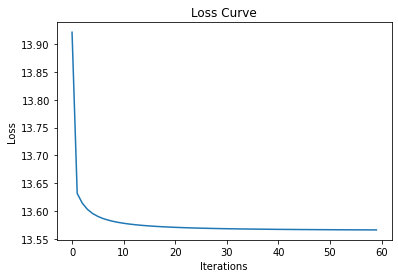

In [ ]:
m_f=Matrix_factorization(50,60)
m_f.matrix_factorization_func()
m_f.plot_curve()

Loss:   10.508603717924496
Loss:   10.069082307340707
Loss:   9.79778356113745
Loss:   9.636088968888277
Loss:   9.536631109787576
Loss:   9.472425187670408
Loss:   9.42910808687546
Loss:   9.398780515322164
Loss:   9.376877742724329
Loss:   9.360637282385559
Loss:   9.348319308866648
Loss:   9.338790029935486
Loss:   9.331288566396692
Loss:   9.325291130876604
Loss:   9.320429045484056
Loss:   9.316437669466708
Loss:   9.313123691121431
Loss:   9.310343660588
Loss:   9.307989587935436
Loss:   9.305979100528829
Loss:   9.304248595509275
Loss:   9.302748405737676
Loss:   9.30143933613339
Loss:   9.300290150282722
Loss:   9.299275725545273
Loss:   9.298375680898255
Loss:   9.297573349609937
Loss:   9.296854997592792
Loss:   9.29620922853824
Loss:   9.29562652140487
Loss:   9.295098873811659
Loss:   9.294619519210773
Loss:   9.294182705504952
Loss:   9.293783516887402
Loss:   9.293417732653065
Loss:   9.293081712209355
Loss:   9.292772301149595
Loss:   9.292486756434828
Loss:   9.29222268

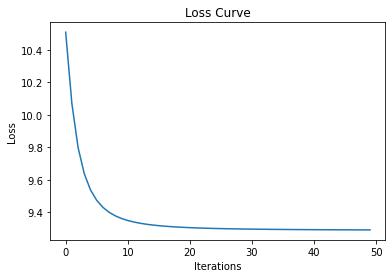

In [ ]:
m_f=Matrix_factorization(1000,50)
m_f.matrix_factorization_func()
m_f.plot_curve()

In [ ]:
res=np.dot(m_f.U, m_f.V)

In [ ]:
pd.DataFrame(res).to_csv("Netflix_Movie_Recommendation.csv")

In [ ]:
pd.DataFrame(m_f.U).to_csv('User_latent_factor.csv')

In [ ]:
pd.DataFrame(m_f.V).to_csv('Movie_latent_factor.csv')

In [ ]:
import pandas as pd
U_c=pd.read_csv('User_latent_factor.csv')

In [ ]:
U_matrix=U_c
del U_matrix['Unnamed: 0']
U_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.138675,0.051948,0.080401,0.080057,-0.069027,0.001904,-0.024184,0.019728,0.046347,0.061210,-0.119188,-0.007956,0.170139,0.055409,0.025163,0.071195,0.117127,0.060531,-0.022917,-0.084533,0.030695,0.100263,0.024327,0.006707,0.003538,0.036189,-0.057462,-0.032431,0.069500,-0.031371,-0.042861,0.056292,0.135594,0.078152,0.001859,0.016529,0.009927,-0.060981,-0.005805,-0.036688,...,0.021148,-0.084104,-0.000531,0.033014,0.139383,0.053415,0.082006,0.081784,0.067858,-0.008812,0.168178,0.038843,-0.004453,0.054513,0.122167,0.065622,0.043559,0.064764,-0.058939,-0.021643,0.052615,0.041615,-0.012265,0.065278,0.030673,-0.042998,0.010877,-0.043104,-0.039224,0.023482,0.116843,-0.068894,-0.012917,0.004365,0.012789,0.016777,-0.055513,-0.041071,0.027296,0.054037
1,0.047271,0.013165,0.039009,0.045512,0.050465,0.071229,-0.058270,0.093237,-0.087712,0.085119,0.008348,-0.003649,0.015978,-0.052423,-0.100864,-0.076741,0.057526,-0.017592,0.053252,0.054998,0.144513,0.077854,0.050175,0.022404,0.135177,-0.001839,-0.014005,0.005304,0.054949,0.103663,0.074421,0.063606,0.018993,0.032857,-0.034329,0.020680,-0.060448,0.101912,0.048889,0.134804,...,-0.006069,0.051760,0.027288,0.017872,0.072483,-0.006133,-0.038050,-0.011474,-0.072031,-0.006998,0.076788,0.054210,0.047679,0.015196,-0.016088,0.129982,0.090279,-0.020466,0.142197,-0.024405,-0.137688,0.054284,0.077370,0.030729,-0.062372,-0.000473,0.162231,0.143847,0.075591,0.086720,0.002059,-0.024627,-0.052654,0.105152,-0.054983,0.007900,0.033207,0.015424,0.071511,-0.082306
2,0.046189,0.032808,0.001352,0.065641,-0.018291,-0.111704,-0.134160,0.120938,0.071569,0.042218,0.014457,0.085868,0.029279,0.037551,-0.036923,0.055434,0.022580,0.155322,0.079043,-0.065270,-0.116464,0.064598,0.023706,0.007455,0.025971,-0.002519,-0.010301,-0.014166,0.004657,-0.011056,0.075962,0.091486,-0.015597,0.133736,-0.047947,0.039056,0.095595,-0.021183,0.016225,0.121384,...,0.014473,0.023310,0.046039,0.028390,-0.045499,0.056730,0.160826,0.065886,-0.052682,0.056781,-0.093349,-0.014252,0.016582,0.091432,0.010094,0.009513,-0.004726,0.076032,0.048711,-0.001678,-0.029805,0.125363,0.026389,0.093063,0.026642,0.096036,-0.005414,0.092096,0.046922,0.034495,0.003650,0.008021,-0.021933,0.126983,0.027919,0.053288,-0.008452,0.067629,-0.001226,0.086055
3,0.036152,0.082684,0.029805,-0.081934,0.055290,-0.070189,0.043923,0.038336,-0.047798,0.053211,0.056654,0.107152,-0.007303,0.057430,0.060866,0.078739,0.048931,0.005862,0.017987,-0.019251,-0.015067,0.121811,0.097789,-0.025739,0.053117,-0.051930,0.046500,0.095974,0.033551,-0.013800,-0.053108,-0.053749,0.040454,-0.001757,0.012377,0.086702,0.059341,0.010042,-0.026223,0.039648,...,0.109137,-0.079279,-0.066259,-0.026453,0.004354,0.094799,0.126627,0.041003,0.017757,0.042298,-0.049397,-0.038238,0.062902,0.049301,0.045579,0.012564,0.116913,0.030445,0.071338,0.071290,-0.013838,-0.032879,0.002150,0.016017,0.082618,0.017078,0.171773,0.080266,0.046480,0.017988,-0.074851,0.113344,-0.045890,0.030530,0.049972,-0.047289,-0.043033,-0.000342,0.015193,-0.032489
4,0.093374,-0.000893,0.000645,0.109712,-0.008616,-0.005165,0.127948,-0.004008,-0.017773,0.114878,-0.002646,0.050800,-0.065210,-0.040060,0.058743,-0.001173,-0.010345,-0.018389,0.065658,0.064667,-0.032023,0.021387,-0.109762,0.025723,0.065936,0.027208,-0.014934,-0.003848,0.037138,-0.065213,0.034965,0.032161,0.054477,0.079390,0.013975,0.011884,-0.035409,0.067546,0.057778,0.072232,...,0.012802,0.084502,0.070679,-0.054416,0.064299,0.171854,0.011326,0.149466,0.121547,-0.048491,0.113693,-0.012264,-0.050402,0.108307,0.102155,-0.026651,0.070875,0.185612,0.049889,-0.001043,0.024963,0.043734,0.032414,0.127472,0.060974,0.050227,0.063590,0.005219,-0.028653,0.007069,-0.051900,0.067274,0.138125,-0.001906,0.022132,-0.022134,

In [ ]:
V_c=pd.read_csv('Movie_latent_factor.csv')

In [ ]:
V_matrix=V_c
del V_matrix['Unnamed: 0']
V_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4944,4945,4946,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983
0,-896.340257,-0.344290,-2.019828,1.913661,0.508367,-1.072623,0.200089,0.312354,-1.483468,-0.926177,-1.076810,-0.435421,0.436423,3.681437,-0.811175,-0.961336,0.525651,1.741380,-0.910836,-1.892298,-0.689613,-0.466449,0.779004,0.112432,-0.049469,0.184271,-0.860964,-0.372810,-0.009171,1.694793,-0.146740,0.124871,-1.425306,-1.466874,0.466053,-1.475167,0.832537,0.100099,-0.769843,0.257265,...,0.945619,-1.458406,-1.024829,-2.764923,1.170667,-1.690516,-0.305586,1.952772,-1.552109,-0.381250,0.207247,-0.816261,-1.564238,2.690739,-1.696129,-0.580303,0.531829,1.576129,2.402863,-0.672572,0.692762,-1.813028,0.879800,1.493920,-0.487183,-2.781205,0.504876,0.049104,-1.607829,-0.557766,-0.352899,-0.665158,1.457058,0.275931,0.636055,1.534306,0.924966,0.303299,-0.923130,0.212231
1,-1653.911692,0.819346,0.685944,-1.622488,-1.188825,-1.159531,-2.029900,-1.237156,0.497417,0.804388,0.570409,-0.088002,0.103471,-0.667940,-1.182549,-0.100478,0.984705,0.913246,-0.061183,0.006633,-0.903288,0.895180,-1.189859,-2.724292,-0.433837,0.065206,1.191225,0.197739,0.804867,0.380604,0.210870,-0.463544,1.143254,1.146119,-1.734713,-1.962849,-1.613409,0.370578,-1.024728,-0.969291,...,3.276038,-1.161833,0.364182,2.102174,1.448339,0.200481,-3.758335,0.018843,1.506755,1.311224,0.994174,0.437053,1.584025,2.557067,-2.351663,1.548045,-0.793480,-0.383114,0.092066,-0.813943,-0.711857,0.534966,0.784507,1.961361,0.820678,0.765332,0.636717,0.498189,0.671109,-1.055939,1.095427,0.261065,-1.286920,1.071022,-0.021866,-2.765526,1.686820,-0.525045,1.267577,-0.148796
2,2160.919041,0.090089,0.211080,-0.544132,3.958354,1.025672,1.612095,-0.661012,-0.328333,0.681293,0.067383,-0.744970,0.392631,-1.166208,1.675697,0.684439,-0.908015,-0.498651,-0.485562,-1.306035,1.340326,-0.399605,-0.965672,1.731931,-0.211093,0.136478,1.255413,1.051409,-1.561342,-2.196300,-1.340103,0.023095,1.742039,-0.744818,1.188577,-0.890174,-0.513346,0.456542,0.106168,1.273908,...,0.852796,-1.130350,1.461550,-0.346645,-1.162381,-0.339911,-1.423792,0.894511,-0.654991,0.504044,-0.802325,0.490390,0.254753,-1.288320,1.129650,1.842771,0.382490,-1.022581,-1.017237,1.969305,-1.546103,0.726791,0.712829,-1.610806,1.139120,0.310919,-0.724681,1.039050,0.891278,-0.720027,0.476710,0.726070,0.787341,-0.310110,-0.831345,0.937476,-0.544296,0.800933,0.003514,-0.209607
3,5672.864428,0.672138,0.701859,-0.967523,0.288295,-1.103987,1.848001,-2.133956,3.258411,-0.535208,-1.014231,-0.458537,-0.803362,-0.735143,2.821906,0.097123,1.151097,0.129357,-1.038889,-2.371204,-1.061876,0.842568,-0.290777,-1.313701,1.215916,-0.256750,-0.169694,-0.413048,-0.558615,0.230635,1.607142,-0.743029,-0.677720,1.271354,0.758113,-0.034541,-0.222395,0.223565,2.787036,0.539057,...,0.440610,-0.240622,-0.754534,0.002706,0.213593,0.121288,-0.236747,-0.320348,3.282776,-0.701726,1.659731,1.932808,1.087357,-0.120857,-1.064008,0.895312,-1.354775,1.531543,-1.408963,0.384504,-0.196237,-0.037710,0.433724,-0.141868,1.326859,0.145170,1.870618,1.064451,1.146232,1.139038,-0.360321,-2.612759,0.558900,0.734758,-1.849298,1.782119,-0.956629,-1.032418,-0.025956,1.212954
4,3574.292015,-0.917956,-0.343724,0.960275,1.050064,2.597726,1.315477,0.137540,1.217089,1.216499,0.675466,-0.653862,0.418339,0.435118,0.171962,0.661953,-1.182832,-1.950471,1.173954,0.193463,0.013640,1.194568,1.770090,0.929474,-1.187357,0.138863,0.777216,-1.917758,0.839383,-1.830272,0.574001,0.380579,-1.014551,1.073685,0.303316,0.323850,0.369839,-0.949288,-0.391032,-0.331847,...,1.281147,0.394600,-1.021690,0.169097,-0.020672,0.292949,-2.404821,-0.073894,0.060068,-0.940757,-0.841149,1.603375,-0.217456,2.125387,0.337864,0.667121,-0.661425,-1.299618,0.593945,0.440647,0.171002,0.147564,0.849449,-0.187919,0.387127,0.

In [ ]:
U_m=U_matrix.to_numpy()
V_m=V_matrix.to_numpy()

print('U_matrix:  ',U_m)
print('V_matrix:  ',V_m)

print(U_m.shape)
print(V_m.shape)

U_matrix:   [[ 0.13867465  0.05194769  0.0804012  ... -0.04107074  0.02729625
   0.05403703]
 [ 0.04727093  0.0131646   0.03900859 ...  0.01542448  0.07151148
  -0.08230643]
 [ 0.04618921  0.03280784  0.00135206 ...  0.06762865 -0.00122575
   0.0860547 ]
 ...
 [ 0.05736927  0.04062334 -0.00299331 ... -0.01417501  0.06879594
   0.03646383]
 [ 0.07402413  0.05872439  0.0291759  ... -0.07670793  0.1187253
   0.06195738]
 [ 0.05794606  0.00141853  0.01244892 ...  0.07157167 -0.01929032
   0.01113852]]
V_matrix:   [[-8.96340257e+02 -3.44290232e-01 -2.01982765e+00 ...  3.03298803e-01
  -9.23129969e-01  2.12230831e-01]
 [-1.65391169e+03  8.19346317e-01  6.85943859e-01 ... -5.25045064e-01
   1.26757653e+00 -1.48795865e-01]
 [ 2.16091904e+03  9.00892175e-02  2.11079877e-01 ...  8.00932966e-01
   3.51361764e-03 -2.09606567e-01]
 ...
 [ 4.41647940e+03  5.86153777e-01 -1.44288648e-01 ... -6.54357664e-01
  -7.74716377e-01  4.16673152e-01]
 [-1.37638598e+03 -1.21685975e+00  1.47239724e+00 ...  2.876

In [ ]:
import numpy as np
correlation=np.corrcoef(np.dot(U_m,V_m))
correlation

Loss:   13.875831261267622
Loss:   13.631262534999063
Loss:   13.613604199837436
Loss:   13.6025207998766
Loss:   13.59520900628891
Loss:   13.590088930536771
Loss:   13.586320635384816
Loss:   13.583437440429147
Loss:   13.58116380199743
Loss:   13.579327550436592
Loss:   13.577815738339442
Loss:   13.576551155133268
Loss:   13.575479188132276
Loss:   13.574560077714354
Loss:   13.573764183239994
Loss:   13.573068960784976
Loss:   13.572456961241642
Loss:   13.57191448917786
Loss:   13.571430651325775
Loss:   13.5709966839052


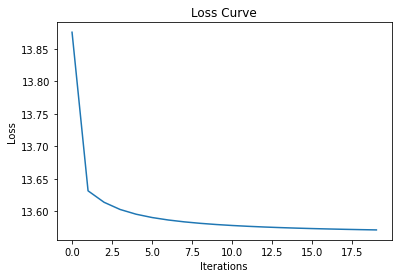

In [ ]:
m_f=Matrix_factorization(50,20)
m_f.matrix_factorization_func()
m_f.plot_curve()

Loss:   15.165515603159495
Loss:   13.813390209655555
Loss:   13.81226864578216
Loss:   13.811570967967269
Loss:   13.811110473308709
Loss:   13.810787558028544
Loss:   13.810550092486386
Loss:   13.810368976638289
Loss:   13.810226764716933
Loss:   13.810112360757623
Loss:   13.810018437145567
Loss:   13.809939957842545
Loss:   13.809873337105158
Loss:   13.80981602032123
Loss:   13.809766143352896
Loss:   13.80972228845682
Loss:   13.809683344106684
Loss:   13.809648499136257
Loss:   13.809617106801426
Loss:   13.809588660969151


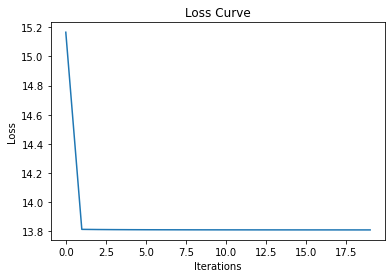

In [ ]:
m_f=Matrix_factorization(5,20)
m_f.matrix_factorization_func()
m_f.plot_curve()

In [ ]:
import numpy as np
correlation=np.corrcoef(np.dot(m_f.U,m_f.V))
correlation